# Classification Models

## Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nbimporter

import TrainTestEvalSplit as split

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Classification Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from yellowbrick.classifier import ClassPredictionError

import pickle

from sklearn.model_selection import KFold
from sklearn.utils import check_X_y

## Import File

In [2]:
full_df = pd.read_csv("../../../Data_thesis/Full_Datasets/Full.csv")
full_df["Date"] = pd.to_datetime(full_df["Date"], format="%Y-%m-%d")

full_df.head()

,Date,Hour,Nieuwmarkt Arrivals,Nieuwezijds Kolk Arrivals,Dam Arrivals,Spui Arrivals,Nieuwmarkt Departures,Nieuwezijds Kolk Departures,Dam Departures,Spui Departures,...,SensorLatitude,CrowdednessCount,is_event,Year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos
0,2018-03-11,100,0.0,0.0,13.0,0.0,0.0,0.0,90.0,0.0,...,5,886,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,0.258819,0.965926
1,2018-03-11,2100,136.0,80.0,409.0,40.0,211.0,119.0,858.0,94.0,...,7,1603,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-0.707107,0.707107
2,2018-03-11,2100,136.0,80.0,409.0,40.0,211.0,119.0,858.0,94.0,...,0,21,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-0.707107,0.707107
3,2018-03-11,2100,136.0,80.0,409.0,40.0,211.0,119.0,858.0,94.0,...,9,88,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-0.707107,0.707107
4,2018-03-11,2100,136.0,80.0,409.0,40.0,211.0,119.0,858.0,94.0,...,2,49,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-0.707107,0.707107


## Train/Test/Eval

In [3]:
size = 0.9
sensor = "GAWW-02"
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [4]:
full_df = split.clasCrowdednessCounts(full_df)

In [5]:
x_train, y_train, x_test, y_test, x_test_series, y_test_series, feature_labels, train_dates = split.trainTestSplit(full_df, size, sensor)

## Models

### Baseline
Implemented the [Sklearn Version](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier)

#### Training

In [56]:
base = DummyClassifier(strategy="stratified", random_state=42)

In [57]:
labels = [1, 2, 3, 4]

mean_acc = 0

mean_precision = 0
mean_recall = 0
mean_f1_score = 0

for train_index, val_index in kf.split(train_dates):
    
    x_train_con, y_train_con = check_X_y(X=x_train[x_train["Date"].isin(train_dates[train_index])].drop(columns={"Date"}),
                                        y=y_train[y_train["Date"].isin(train_dates[train_index])]["CrowdednessCount"])
    base.fit(x_train_con,y_train_con)
    
    x_val_con, y_val_con = check_X_y(X=x_train[x_train["Date"].isin(train_dates[val_index])].drop(columns={"Date"}),
                                    y=y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"])
    
    y_pred_base = base.predict(x_val_con)
    
    mean_acc += accuracy_score(y_val_con, y_pred_base)

    mean_precision += precision_score(y_val_con, y_pred_base, average=None)
    mean_recall += recall_score(y_val_con, y_pred_base, average=None)
    mean_f1_score += f1_score(y_val_con, y_pred_base, average=None)

mean_acc = round(((mean_acc / 10) * 100),2)
mean_precision = (mean_precision / 10) * 100
mean_recall = (mean_recall / 10) * 100
mean_f1_score = (mean_f1_score / 10) * 100

print("Mean Accuracy Score: ", mean_acc, "\n")

for i in range(len(labels)):
    print("For label {0}".format(labels[i]))
    print("Mean Precision Score: ", round(mean_precision[i], 2))
    print("Mean Recall Score: ", round(mean_recall[i], 2))
    print("Mean F1 Score: ", round(mean_f1_score[i], 2), "\n")

Mean Accuracy Score:  24.87 

For label 1
Mean Precision Score:  24.74
Mean Recall Score:  24.46
Mean F1 Score:  24.57 

For label 2
Mean Precision Score:  25.08
Mean Recall Score:  25.49
Mean F1 Score:  25.27 

For label 3
Mean Precision Score:  24.93
Mean Recall Score:  24.27
Mean F1 Score:  24.52 

For label 4
Mean Precision Score:  24.93
Mean Recall Score:  25.43
Mean F1 Score:  25.05 



#### Test

Accuracy Score:  0.24525866348922648
              precision    recall  f1-score   support

           1       0.25      0.24      0.25      2525
           2       0.25      0.25      0.25      2562
           3       0.24      0.23      0.24      2539
           4       0.24      0.25      0.25      2445

   micro avg       0.25      0.25      0.25     10071
   macro avg       0.25      0.25      0.25     10071
weighted avg       0.25      0.25      0.25     10071



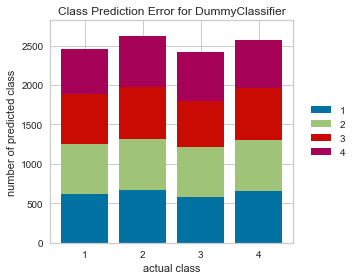

In [59]:
y_pred_test_base = base.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_test_base))
print(classification_report(y_test, y_pred_test_base))

visualizer = ClassPredictionError(
    base
)

visualizer.fit(x_train.drop(columns={"Date"}), y_train["CrowdednessCount"])
visualizer.score(x_test, y_test)
g = visualizer.poof()

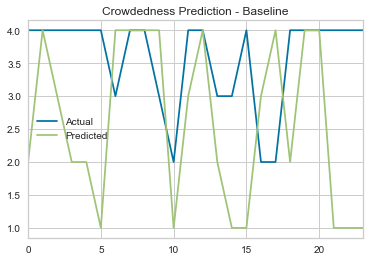

In [61]:
#Time series
time_pred_test_bas = base.predict(x_test_series)

time_pred_series_test_bas = pd.Series(time_pred_test_bas)
time_real_series_test_bas = pd.Series(y_test_series)

time_real_series_test_bas.plot(legend=True, label="Actual")
time_pred_series_test_bas.plot(legend=True, title='Crowdedness Prediction - Baseline', label="Predicted")
plt.show()

### Random Forrest Classifier 
Implemented the [Sklearn Version](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

#### Training

In [62]:
rfc = RandomForestClassifier(n_estimators=300, criterion="entropy", n_jobs=50, random_state=42, 
                                  class_weight="balanced", oob_score="True")

In [63]:
labels = [1, 2, 3, 4]

mean_acc = 0

mean_precision = 0
mean_recall = 0
mean_f1_score = 0

for train_index, val_index in kf.split(train_dates):
    
    x_train_con, y_train_con = check_X_y(X=x_train[x_train["Date"].isin(train_dates[train_index])].drop(columns={"Date"}),
                                        y=y_train[y_train["Date"].isin(train_dates[train_index])]["CrowdednessCount"])
    rfc.fit(x_train_con,y_train_con)
    
    x_val_con, y_val_con = check_X_y(X=x_train[x_train["Date"].isin(train_dates[val_index])].drop(columns={"Date"}),
                                    y=y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"])
    
    y_pred_base = rfc.predict(x_val_con)
    
    mean_acc += accuracy_score(y_val_con, y_pred_base)

    mean_precision += precision_score(y_val_con, y_pred_base, average=None)
    mean_recall += recall_score(y_val_con, y_pred_base, average=None)
    mean_f1_score += f1_score(y_val_con, y_pred_base, average=None)

mean_acc = round(((mean_acc / 10) * 100),2)
mean_precision = (mean_precision / 10) * 100
mean_recall = (mean_recall / 10) * 100
mean_f1_score = (mean_f1_score / 10) * 100

print("Mean Accuracy Score: ", mean_acc, "\n")

for i in range(len(labels)):
    print("For label {0}".format(labels[i]))
    print("Mean Precision Score: ", round(mean_precision[i], 2))
    print("Mean Recall Score: ", round(mean_recall[i], 2))
    print("Mean F1 Score: ", round(mean_f1_score[i], 2), "\n")

Mean Accuracy Score:  87.0 

For label 1
Mean Precision Score:  87.44
Mean Recall Score:  83.24
Mean F1 Score:  85.27 

For label 2
Mean Precision Score:  83.37
Mean Recall Score:  82.42
Mean F1 Score:  82.88 

For label 3
Mean Precision Score:  88.02
Mean Recall Score:  88.5
Mean F1 Score:  88.25 

For label 4
Mean Precision Score:  88.88
Mean Recall Score:  93.88
Mean F1 Score:  91.28 



#### Test

Accuracy Score:  0.8659517426273459
              precision    recall  f1-score   support

           1       0.86      0.83      0.85      2525
           2       0.82      0.81      0.82      2562
           3       0.88      0.89      0.88      2539
           4       0.90      0.93      0.92      2445

   micro avg       0.87      0.87      0.87     10071
   macro avg       0.87      0.87      0.87     10071
weighted avg       0.87      0.87      0.87     10071



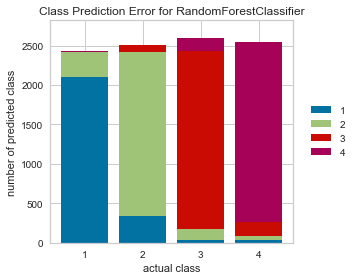

In [65]:
y_pred_test_rfc = rfc.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_test_rfc))
print(classification_report(y_test, y_pred_test_rfc))

visualizer = ClassPredictionError(
    rfc
)

visualizer.fit(x_train.drop(columns={"Date"}), y_train["CrowdednessCount"])
visualizer.score(x_test, y_test)
g = visualizer.poof()

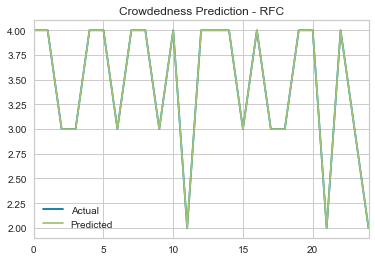

In [35]:
#Time series
time_pred_test_rfc = rfc.predict(x_test_series)

time_pred_series_test_rfc = pd.Series(time_pred_test_rfc)
time_real_series_test_rfc = pd.Series(y_test_series)

time_real_series_test_rfc.plot(legend=True, label="Actual")
time_pred_series_test_rfc.plot(legend=True, title='Crowdedness Prediction - RFC', label="Predicted")
plt.show()

#### Save Model to File

In [50]:
filename = "../../../Data_thesis/Models/rfc_model.sav"

pickle.dump(rfc, open(filename, 'wb'))

### XGBoost 
Implement [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_intro.html)

#### Training

In [66]:
xgb = xgb.XGBClassifier(random_state=42, n_estimators=300, max_depth=12, 
                              learning_rate=0.1, booster="gbtree", n_jobs=50)

In [71]:
labels = [1, 2, 3, 4]

mean_acc = 0

mean_precision = 0
mean_recall = 0
mean_f1_score = 0

for train_index, val_index in kf.split(train_dates):
    
    xgb.fit(x_train[x_train["Date"].isin(train_dates[train_index])].drop(columns={"Date"}),
            y_train[y_train["Date"].isin(train_dates[train_index])]["CrowdednessCount"])
    
    y_pred_base = xgb.predict(x_train[x_train["Date"].isin(train_dates[val_index])].drop(columns={"Date"}))
    
    mean_acc += accuracy_score(y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"], y_pred_base)

    mean_precision += precision_score(y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"], y_pred_base, average=None)
    mean_recall += recall_score(y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"], y_pred_base, average=None)
    mean_f1_score += f1_score(y_train[y_train["Date"].isin(train_dates[val_index])]["CrowdednessCount"], y_pred_base, average=None)

mean_acc = round(((mean_acc / 10) * 100),2)
mean_precision = (mean_precision / 10) * 100
mean_recall = (mean_recall / 10) * 100
mean_f1_score = (mean_f1_score / 10) * 100

print("Mean Accuracy Score: ", mean_acc, "\n")

for i in range(len(labels)):
    print("For label {0}".format(labels[i]))
    print("Mean Precision Score: ", round(mean_precision[i], 2))
    print("Mean Recall Score: ", round(mean_recall[i], 2))
    print("Mean F1 Score: ", round(mean_f1_score[i], 2), "\n")

Mean Accuracy Score:  87.09 

For label 1
Mean Precision Score:  86.75
Mean Recall Score:  84.48
Mean F1 Score:  85.59 

For label 2
Mean Precision Score:  83.62
Mean Recall Score:  82.48
Mean F1 Score:  83.04 

For label 3
Mean Precision Score:  88.05
Mean Recall Score:  88.52
Mean F1 Score:  88.27 

For label 4
Mean Precision Score:  89.66
Mean Recall Score:  92.89
Mean F1 Score:  91.23 



#### Test

Accuracy Score:  0.870420017873101
              precision    recall  f1-score   support

           1       0.86      0.85      0.85      2525
           2       0.83      0.82      0.82      2562
           3       0.88      0.89      0.89      2539
           4       0.91      0.92      0.92      2445

   micro avg       0.87      0.87      0.87     10071
   macro avg       0.87      0.87      0.87     10071
weighted avg       0.87      0.87      0.87     10071



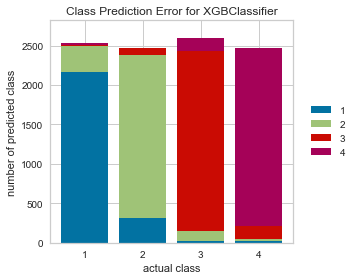

In [72]:
y_pred_test_xgb = xgb.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))

visualizer = ClassPredictionError(
    xgb
)

visualizer.fit(x_train.drop(columns={"Date"}), y_train["CrowdednessCount"])
visualizer.score(x_test, y_test)
g = visualizer.poof()

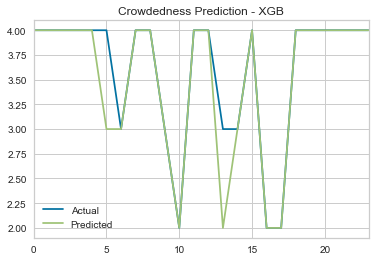

In [73]:
#Time series
time_pred_test_xgb = xgb.predict(x_test_series)

time_pred_series_test_xgb = pd.Series(time_pred_test_xgb)
time_real_series_test_xgb = pd.Series(y_test_series)

time_real_series_test_xgb.plot(legend=True, label="Actual")
time_pred_series_test_xgb.plot(legend=True, title='Crowdedness Prediction - XGB', label="Predicted")
plt.show()

#### Save Model to File

In [53]:
filename = "../../../Data_thesis/Models/xgbc_model.sav"

pickle.dump(xgb, open(filename, 'wb'))